# Embedding-as-a-Service using Sentence Transformers, the Hugging Face Inference API, and 🤗Datasets: Notebook Companion



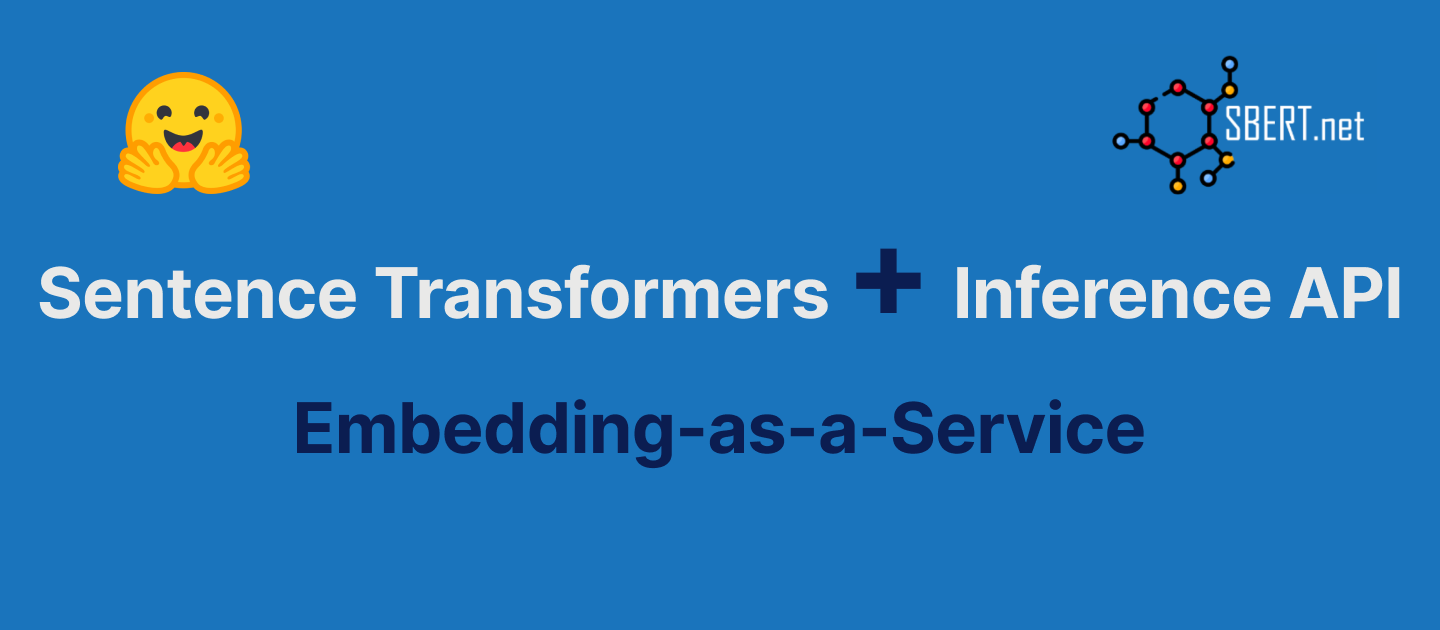

## 1. Using the Hugging Face Inference API to embed our dataset

In [ ]:
model_id = "sentence-transformers/all-MiniLM-L6-v2"
hf_token = "get your token in http://hf.co/settings/tokens"

In [ ]:
import requests
from typing import Dict

api_url = f"https://api-inference.huggingface.co/pipeline/feature-extraction/{model_id}"
headers = {"Authorization": f"Bearer {hf_token}"}

def query(texts: Dict):
    response = requests.post(api_url, headers=headers, json=texts)
    return response.json()

In [ ]:
texts = ["How do I get a replacement Medicare card?",
        "What is the monthly premium for Medicare Part B?",
        "How do I terminate my Medicare Part B (medical insurance)?",
        "How do I sign up for Medicare?",
        "Can I sign up for Medicare Part B if I am working and have health insurance through an employer?",
        "How do I sign up for Medicare Part B if I already have Part A?",
        "What are Medicare late enrollment penalties?",
        "What is Medicare and who can get it?",
        "How can I get help with my Medicare Part A and Part B premiums?",
        "What are the different parts of Medicare?",
        "Will my Medicare premiums be higher because of my higher income?",
        "What is TRICARE ?",
        "Should I sign up for Medicare Part B if I have Veterans’ Benefits?"]

output = query(dict(inputs = texts))

In [ ]:
import pandas as pd

embeddings = pd.DataFrame(output)

In [ ]:
print(embeddings)

         0         1         2         3         4         5         6    \
0  -0.023889  0.055259 -0.011655 -0.033414 -0.012261 -0.024873 -0.012663   
1  -0.012688  0.046874 -0.010502 -0.020384 -0.013361  0.042322  0.016628   
2   0.000494  0.119412  0.005229 -0.092734  0.007773 -0.005325  0.034506   
3  -0.029711  0.023298 -0.057041 -0.012183 -0.013710  0.029796  0.063739   
4  -0.025628  0.070389 -0.017380 -0.056567  0.028576  0.052823  0.067062   
5  -0.022656  0.021160  0.005105 -0.046494  0.009074  0.041495  0.054268   
6  -0.002911  0.060791 -0.009176 -0.006133  0.040492  0.036594  0.002054   
7  -0.080526  0.059888 -0.048847 -0.040176 -0.063342  0.041848  0.119045   
8  -0.034388  0.072501  0.014440 -0.036695  0.014019  0.063070  0.034683   
9  -0.005964  0.025044 -0.003182 -0.025243 -0.039823 -0.012772  0.044713   
10 -0.039008 -0.010610 -0.007383 -0.050190 -0.002518 -0.041641  0.026969   
11 -0.095983 -0.063012 -0.116906 -0.059075 -0.051323 -0.003439  0.018687   
12 -0.011629

## 2. Host your embedded dataset for free on the Hugging Face Hub


In [ ]:
%%capture
!pip install huggingface-hub

In [ ]:
!huggingface-cli login


        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
        (Deprecated, will be removed in v0.3.0) To login with username and password instead, interrupt with Ctrl+C.
        
Token: 
Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machi

In [ ]:
!huggingface-cli repo create embedded_faqs_medicare --type dataset --organization ITESM

git version 2.17.1
Error: unknown flag: --version

Sorry, no usage text found for "git-lfs"

You are about to create datasets/ITESM/embedded_faqs_medicare
Proceed? [Y/n] y

Your repo now lives at:
  https://huggingface.co/datasets/ITESM/embedded_faqs_medicare

You can clone it locally with the command below, and commit/push as usual.

  git clone https://huggingface.co/datasets/ITESM/embedded_faqs_medicare



In [ ]:
# This is code required to install git-lfs however it already is installed in Colab instances.
#!git lfs install

Error: Failed to call git rev-parse --git-dir --show-toplevel: "fatal: not a git repository (or any of the parent directories): .git\n"
Git LFS initialized.


In [ ]:
!git clone https://{your HF user here}:{your token here}@huggingface.co/datasets/ITESM/embedded_faqs_medicare

Cloning into 'embedded_faqs_medicare'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
embeddings.to_csv("embedded_faqs_medicare/embeddings.csv", index=False)
print(embeddings.shape)

Changing directory to our repo `embedded_faqs_medicare`.

In [ ]:
%cd embedded_faqs_medicare/

/content/embedded_faqs_medicare


In [ ]:
!git lfs track *.csv
!git add .gitattributes
!git add embeddings.csv

Tracking "embeddings.csv"


In [ ]:
!git config --global user.email "your email here"
!git config --global user.name "your git user here"

In [ ]:
!git commit -m "First version of the embedded_faqs_medicare dataset"
!git push

[main fc6fd98] First version of the embedded_faqs_medicare dataset
 2 files changed, 15 insertions(+)
 create mode 100644 embeddings.csv
Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 47.28 KiB | 4.73 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0)
To https://huggingface.co/datasets/ITESM/embedded_faqs_medicare
   68bbeb7..fc6fd98  main -> main


## 3. Make a query and get the most similar FAQs

Load embeddings

In [ ]:
%%capture
!pip install datasets

In [ ]:
from datasets import load_dataset

faqs_embeddings = load_dataset('ITESM/embedded_faqs_medicare')
np_embeddings = faqs_embeddings["train"].to_pandas().to_numpy()

Using custom data configuration ITESM--embedded_faqs_medicare-cb978a6449c82d29


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/ITESM___csv/ITESM--embedded_faqs_medicare-cb978a6449c82d29/0.0.0/51cce309a08df9c4d82ffd9363bbe090bf173197fc01a71b034e8594995a1a58. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
question = ["How can Medicare help me?"]

output = query(dict(inputs = question))

import numpy as np
query_embeddings = np.asarray(output)

print(query_embeddings.shape)

(1, 384)


In [ ]:
def cos_sim(query, embedded_dataset):
  return np.matmul(query, np.transpose(embedded_dataset)) / (np.linalg.norm(query) * np.linalg.norm(embedded_dataset))

In [ ]:
hits = cos_sim(query_embeddings, np_embeddings)

In [ ]:
def top_faqs(hits_array):
  return np.flip(np.argpartition(hits_array, range(hits_array.size-1))).tolist()[0]

index_top_faqs = top_faqs(hits)
print(index_top_faqs)

[8, 7, 3, 9, 10, 0, 5, 2, 4, 1, 12, 6, 11]


In [ ]:
[texts[i] for i in index_top_faqs]    

['How can I get help with my Medicare Part A and Part B premiums?',
 'What is Medicare and who can get it?',
 'How do I sign up for Medicare?',
 'What are the different parts of Medicare?',
 'Will my Medicare premiums be higher because of my higher income?',
 'How do I get a replacement Medicare card?',
 'How do I sign up for Medicare Part B if I already have Part A?',
 'How do I terminate my Medicare Part B (medical insurance)?',
 'Can I sign up for Medicare Part B if I am working and have health insurance through an employer?',
 'What is the monthly premium for Medicare Part B?',
 'Should I sign up for Medicare Part B if I have Veterans’ Benefits?',
 'What are Medicare late enrollment penalties?',
 'What is TRICARE ?']